<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:54: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:54: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_227187/2930203795.py:48: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), 'k-', label="Exact $f(x) = \sin(4 \pi x)$")
/tmp/ipykernel_227187/2930203795.py:54: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Mesh Adaptation Example for $f(x) = \sin(4 \pi x)$")


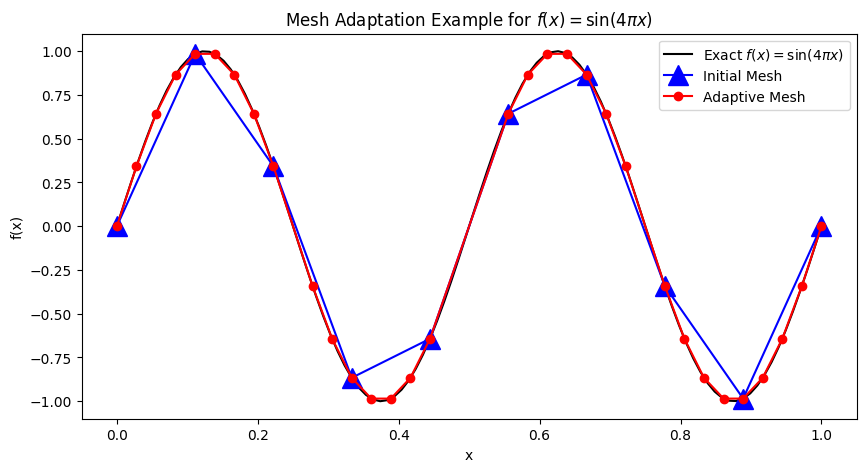

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivatives
def f(x):
    return np.sin(4 * np.pi * x)

def f_prime(x):
    return 4 * np.pi * np.cos(4 * np.pi * x)

def f_second(x):
    return -16 * (np.pi**2) * np.sin(4 * np.pi * x)


# Find regions with high second derivatives for refinement
def adapt(x_initial):
    x_adaptive = [x_initial[0]]  # Start with the first point
    for i in range(1, len(x_initial)):
        x1, x2 = x_initial[i - 1], x_initial[i]
        mid = (x1 + x2) / 2
        if abs(f_second(mid)) > error_threshold:
            x_adaptive.extend([x1, mid])  # Add midpoint for refinement
        else:
            x_adaptive.append(x1)
    x_adaptive.append(x_initial[-1])  # End with the last point
    return x_adaptive

# Initial uniform mesh
x_initial = np.linspace(0, 1, 10)
y_initial = f(x_initial)

# Error estimation
error_threshold = 3  # Set threshold for refinement based on derivative magnitude

x_adaptive_temp = x_initial
for i in range(2):
    x_adaptive_temp = adapt(x_adaptive_temp)

x_adaptive = x_adaptive_temp


# Remove duplicates and sort points
x_adaptive = np.unique(x_adaptive)
y_adaptive = f(x_adaptive)

# Plotting the initial and adapted meshes
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), 'k-', label="Exact $f(x) = \sin(4 \pi x)$")
plt.plot(x_initial, y_initial, 'b^-', label="Initial Mesh", markersize=15)
plt.plot(x_adaptive, y_adaptive, 'ro-', label="Adaptive Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Mesh Adaptation Example for $f(x) = \sin(4 \pi x)$")
plt.show()
